In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vigu8899","key":"3fce827dfa6f81e00df54891027289eb"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              216KB  2021-03-21 11:36:30            662  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            533  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            553  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            226  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [8]:
 !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 32.8MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.8MB/s]


In [9]:
! mkdir train

In [10]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [11]:
import argparse
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications import VGG16,VGG19,ResNet50,ResNet101
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import precision_recall_curve,roc_curve
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization,Activation,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
import numpy as np
import cv2
iPaths = os.listdir('/content/chest_xray/chest_xray')   #image paths
iPaths

['test', 'train', '.DS_Store', 'val']

In [13]:
train_data ='/content/chest_xray/chest_xray/train'
test_data ='/content/chest_xray/chest_xray/test'
val_data ='/content/chest_xray/chest_xray/val'

In [14]:
train_normal=os.listdir('/content/chest_xray/chest_xray/train/NORMAL')
train_pneumonia=os.listdir('/content/chest_xray/chest_xray/train/PNEUMONIA')

In [15]:
labels=["NORMAL","PNEUMONIA"]

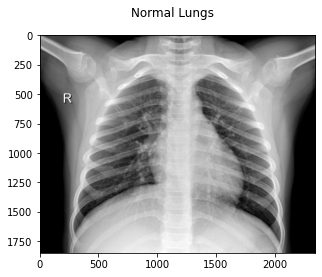

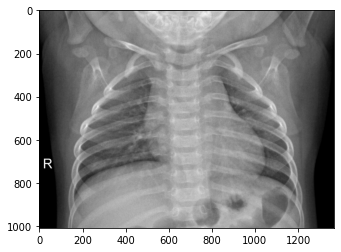

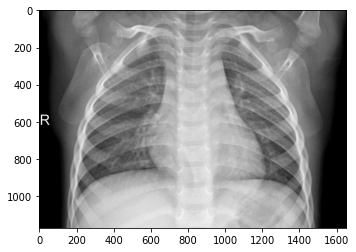

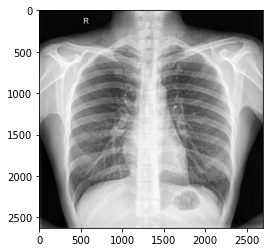

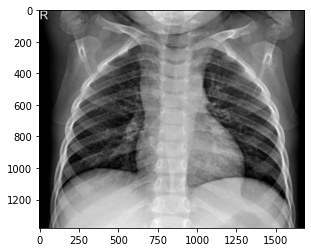

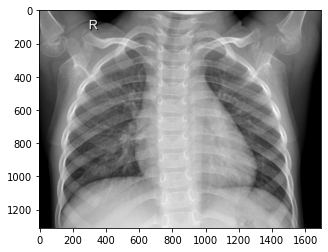

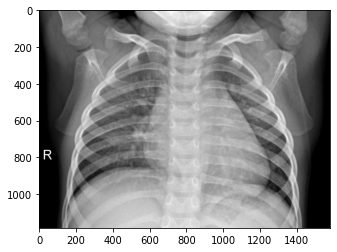

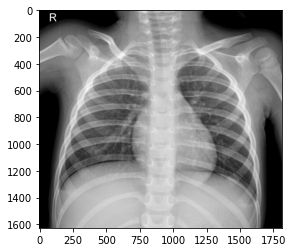

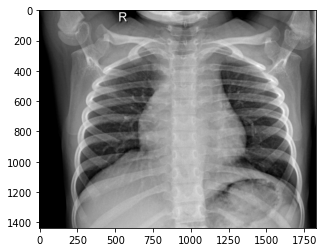

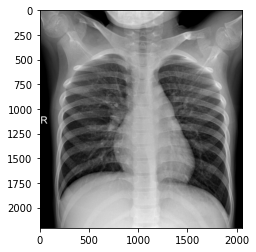

In [16]:
plt.suptitle('Normal Lungs')
for i in range(0,10):
    img = train_normal[i]
    img = load_img('/content/chest_xray/chest_xray/train/NORMAL/'+ img)
    plt.imshow(img)
    plt.show()

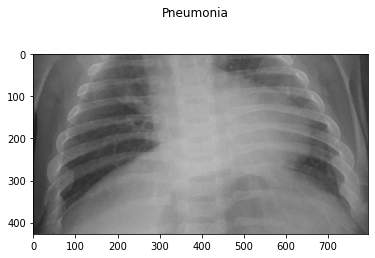

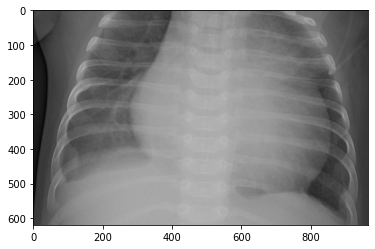

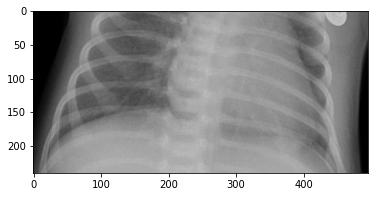

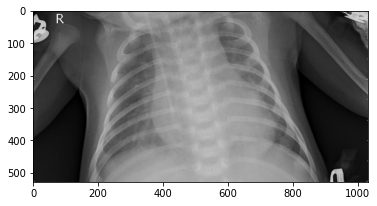

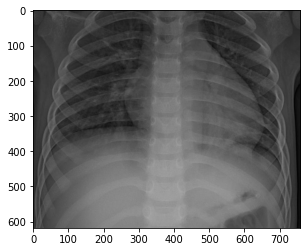

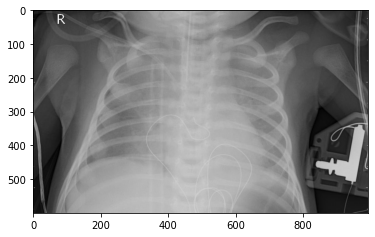

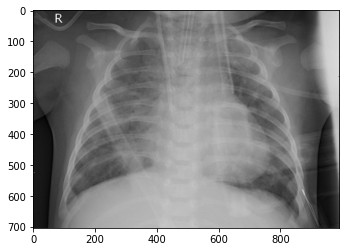

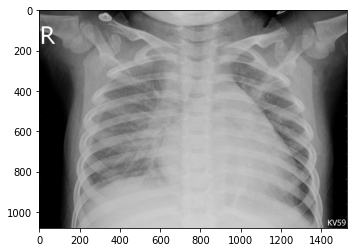

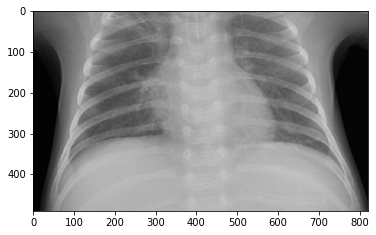

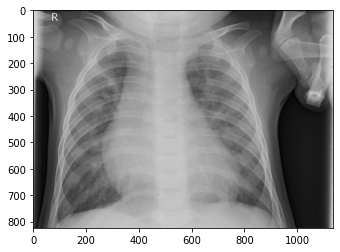

In [17]:
plt.suptitle('Pneumonia')
for i in range(0,10):
    img = train_pneumonia[i]
    img = load_img('/content/chest_xray/chest_xray/train/PNEUMONIA/'+ img)
    plt.imshow(img)
    plt.show()

In [18]:
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [19]:
train = get_training_data(train_data)
test = get_training_data(test_data)
val = get_training_data(val_data)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [20]:
X_train =[]
Y_train= []

X_val=[]
Y_val=[]

X_test=[]
Y_test=[]

for feature,label in train:
  X_train.append(feature)
  Y_train.append(label)
for feature,label in test:
  X_test.append(feature)
  Y_test.append(label)
for feature,label in val:
  X_val.append(feature)
  Y_val.append(label)



In [21]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [22]:

X_train = X_train.reshape(-1, img_size, img_size, 1)
Y_train = np.array(Y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
Y_val = np.array(Y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
Y_test = np.array(Y_test)

In [23]:

datageneration = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datageneration.fit(X_train)

In [24]:
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(5216, 150, 150, 1)
(624,)
(5216,)
(624,)
(16, 150, 150, 1)
(16,)


In [25]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2,strides = 2))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2,strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2,strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2,strides = 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units = 512,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [26]:
##!pip install keras
#!pip uninstall keras
#!pip install keras==2.2.4

In [27]:

RLR =ReduceLROnPlateau(monitor='val_loss', #quantity to be monitored
                                         factor=0.1, #factor by which the lerning rate  will bw reduced new=old*factor 0.3
                                         patience=3,#number of epochs with no improvement after which learning rate will be reduced 2
                                         cooldown=3,#number of epochs to wait before resuming noraml operation after lr has been reduced
                                         min_lr=0.0001,# lower bound of learning rate
                                         min_delta=0.0001, 
                                         verbose=10)#quiet,1:update message

callbacks = [RLR]

In [28]:
hist=model.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 49s 89ms/step - loss: 1.3087 - accuracy: 0.7970 - val_loss: 6.4413 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 14s 84ms/step - loss: 0.2281 - accuracy: 0.9088 - val_loss: 6.1093 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 14s 84ms/step - loss: 0.2105 - accuracy: 0.9126 - val_loss: 16.3833 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 14s 84ms/step - loss: 0.2000 - accuracy: 0.9214 - val_loss: 6.1613 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 14s 84ms/step - loss: 0.1864 - accuracy: 0.9284 - val_loss: 1.1290 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 14s 83ms/step - loss: 0.1873 - accuracy: 0.9324 - val_loss: 8.7582 - val_accuracy: 0.5625
Epoch 7/20
163/163 [==============================] - 14s 84ms/step - loss: 0.1730 - accuracy: 0.9373 - val_loss: 1.9641 - val_accuracy

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0

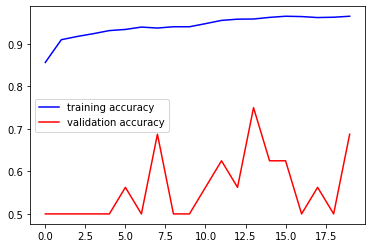

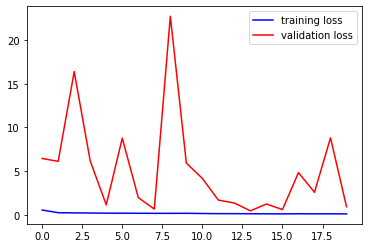

In [30]:
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [31]:
scor = model.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 1s - loss: 0.5934 - accuracy: 0.7628
test los 0.5934
test acc 0.7628


In [32]:
scor = model.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 4s - loss: 1.0407 - accuracy: 0.6660
train los 1.0407
train acc 0.6660


In [33]:

prediction =np.argmax(model.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]

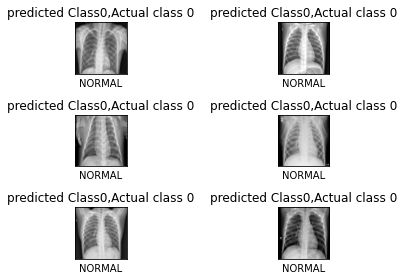

In [35]:
j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

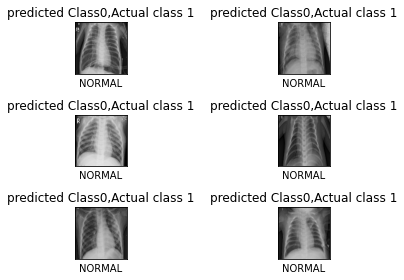

In [36]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

In [37]:
pred=model.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

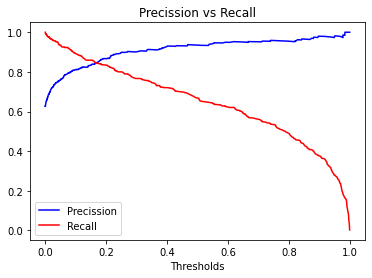

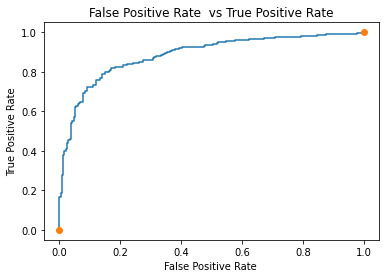

In [38]:
def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)

In [39]:
# classification report 

In [40]:
#model1

In [41]:
model1 = Sequential()
model1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model1.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model1.add(Flatten())
model1.add(Dense(units = 512 , activation = 'relu'))
model1.add(Dropout(0.5))


model1.add(Dense(units = 1 , activation = 'sigmoid'))
model1.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
hist1=model1.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 11s 63ms/step - loss: 1.3597 - accuracy: 0.8156 - val_loss: 18.5844 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 10s 62ms/step - loss: 0.2587 - accuracy: 0.8966 - val_loss: 19.1160 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 10s 61ms/step - loss: 0.2194 - accuracy: 0.9207 - val_loss: 15.5247 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 10s 61ms/step - loss: 0.1772 - accuracy: 0.9372 - val_loss: 16.6536 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 10s 61ms/step - loss: 0.2051 - accuracy: 0.9252 - val_loss: 0.5036 - val_accuracy: 0.8125
Epoch 6/20
163/163 [==============================] - 10s 61ms/step - loss: 0.1730 - accuracy: 0.9417 - val_loss: 16.3723 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 10s 62ms/step - loss: 0.1642 - accuracy: 0.9392 - val_loss: 4.3241 - val_accu

In [43]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 38, 38, 32)       

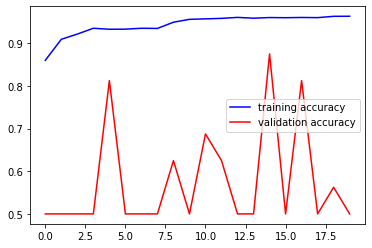

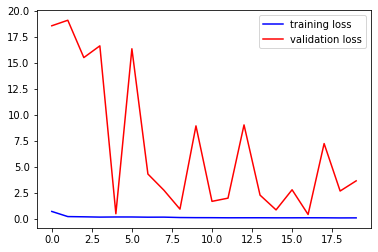

In [44]:
accuracy = hist1.history['accuracy']
val_accuracy=hist1.history['val_accuracy']
loss=hist1.history['loss']
val_loss=hist1.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [45]:
scor = model1.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 0s - loss: 0.5424 - accuracy: 0.8542
test los 0.5424
test acc 0.8542


In [46]:
scor = model1.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 1s - loss: 0.0885 - accuracy: 0.9682
train los 0.0885
train acc 0.9682


In [47]:
prediction =np.argmax(model1.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]

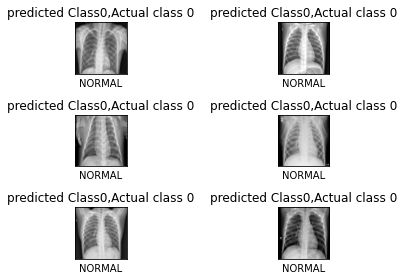

In [49]:
j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

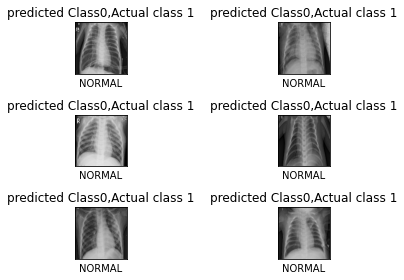

In [50]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

In [51]:
pred=model1.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

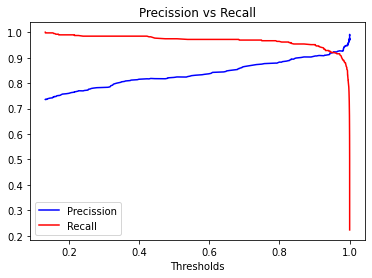

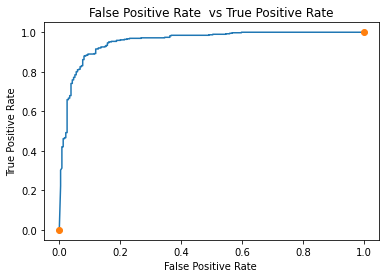

In [52]:
def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)

In [53]:
# classification report model 1

In [54]:
####  vgg16

In [55]:
vgg16_model= VGG16(input_shape=(150,150,1),include_top=False,weights=None)


In [56]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

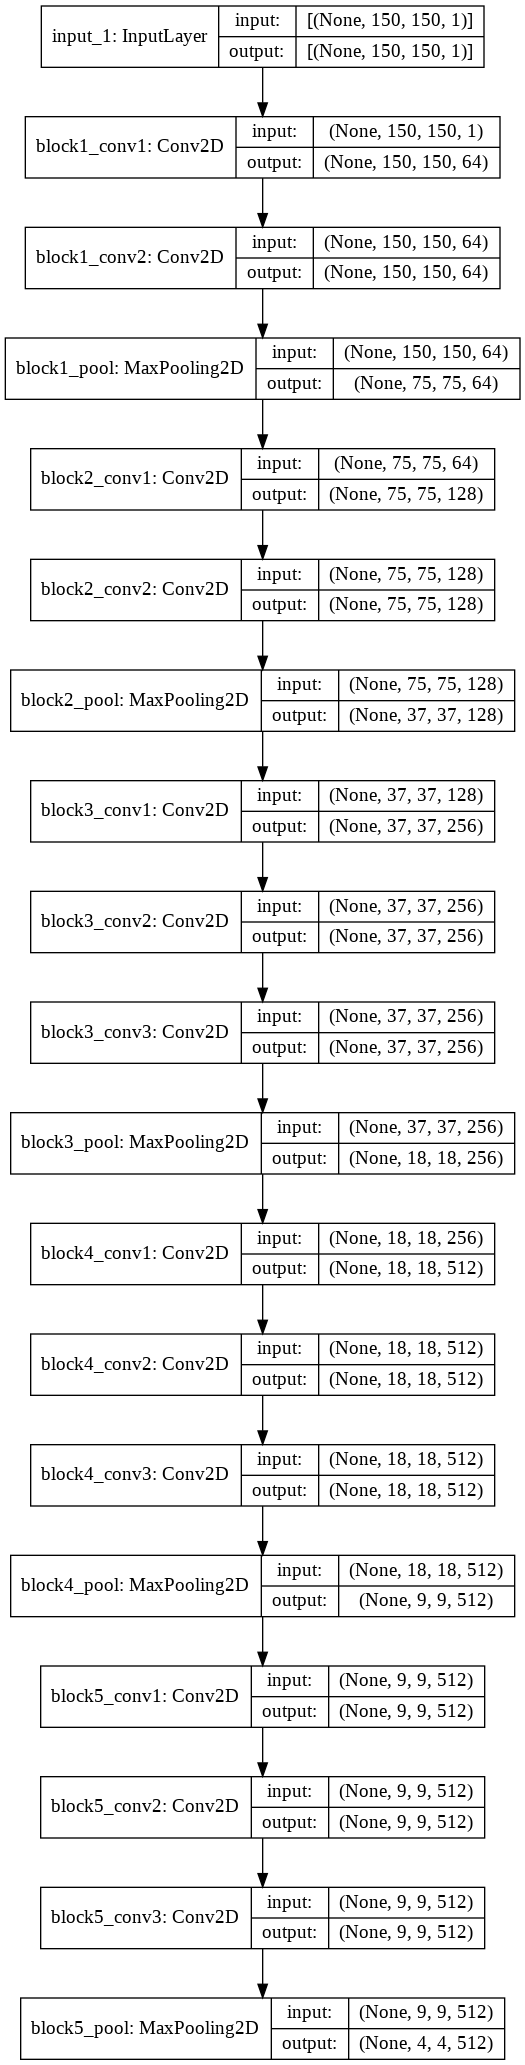

In [57]:
from keras.utils.vis_utils import plot_model
plot_model(vgg16_model, to_file='vggmodel1_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
vggmodel1 = Sequential(vgg16_model.layers)
vggmodel1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
vggmodel1.add(BatchNormalization())
vggmodel1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

vggmodel1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
vggmodel1.add(Dropout(0.1))
vggmodel1.add(BatchNormalization())
vggmodel1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

vggmodel1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
vggmodel1.add(Dropout(0.2))
vggmodel1.add(BatchNormalization())
vggmodel1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

vggmodel1.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
vggmodel1.add(Dropout(0.2))
vggmodel1.add(BatchNormalization())
vggmodel1.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

vggmodel1.add(Flatten())
vggmodel1.add(Dense(units = 512 , activation = 'relu'))
vggmodel1.add(Dropout(0.5))


vggmodel1.add(Dense(units = 1 , activation = 'sigmoid'))
vggmodel1.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
vgghist1=vggmodel1.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 42s 219ms/step - loss: 0.6361 - accuracy: 0.6761 - val_loss: 2.1753 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 33s 204ms/step - loss: 0.4662 - accuracy: 0.7824 - val_loss: 1.2021 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 33s 204ms/step - loss: 0.3858 - accuracy: 0.8238 - val_loss: 0.8728 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 33s 204ms/step - loss: 0.2856 - accuracy: 0.8731 - val_loss: 1.1382 - val_accuracy: 0.5625
Epoch 5/20
163/163 [==============================] - 33s 204ms/step - loss: 0.2698 - accuracy: 0.8822 - val_loss: 1.0277 - val_accuracy: 0.5625
Epoch 6/20
163/163 [==============================] - 33s 203ms/step - loss: 0.2558 - accuracy: 0.8889 - val_loss: 0.9121 - val_accuracy: 0.4375

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/20
163/163 [============================

In [60]:
vggmodel1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)      

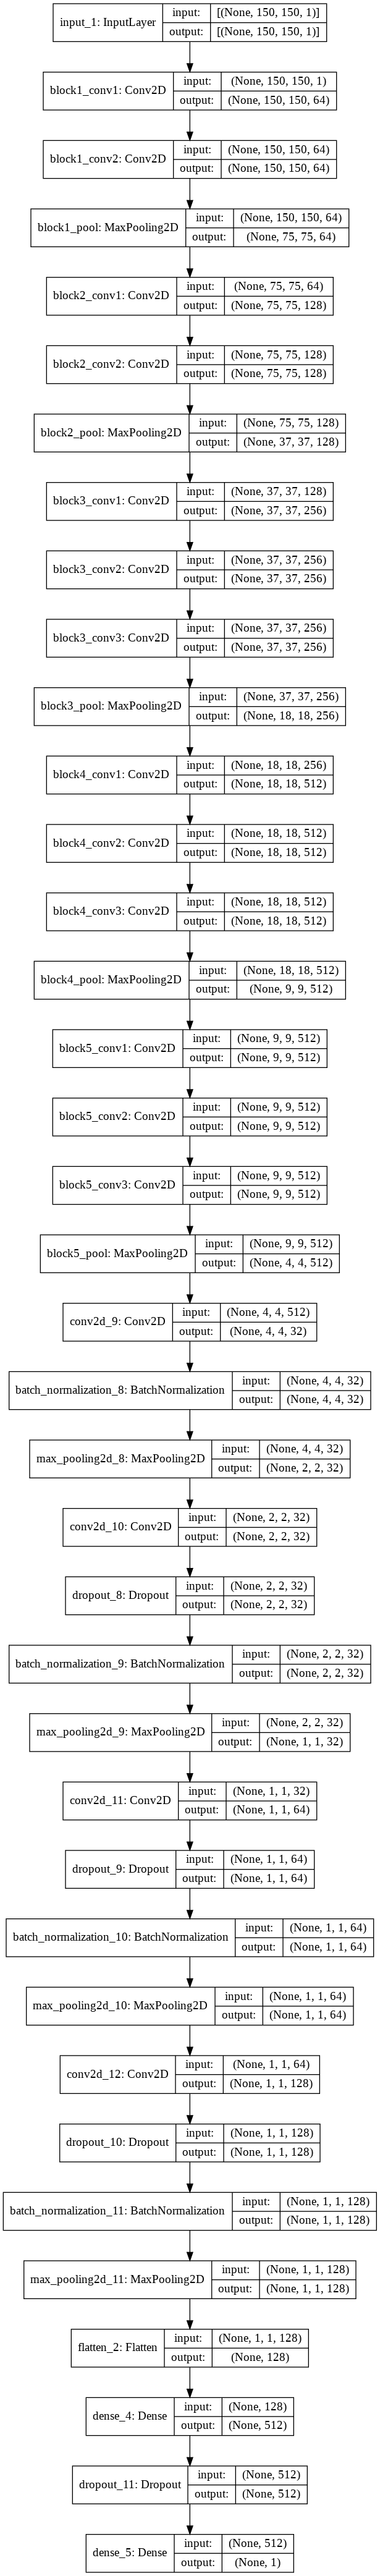

In [61]:
plot_model(vggmodel1, to_file='vggmodel1_plot.png', show_shapes=True, show_layer_names=True)

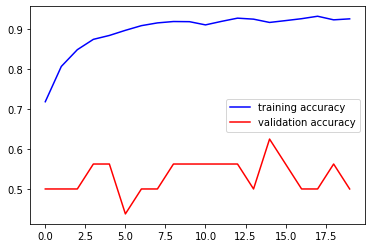

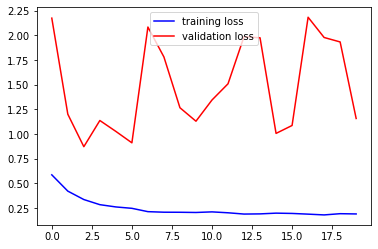

In [62]:
accuracy = vgghist1.history['accuracy']
val_accuracy=vgghist1.history['val_accuracy']
loss=vgghist1.history['loss']
val_loss=vgghist1.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [63]:
scor = vggmodel1.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 1s - loss: 0.4046 - accuracy: 0.8526
test los 0.4046
test acc 0.8526


In [64]:
scor = vggmodel1.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 11s - loss: 0.1345 - accuracy: 0.9502
train los 0.1345
train acc 0.9502


In [65]:
prediction =np.argmax(vggmodel1.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]

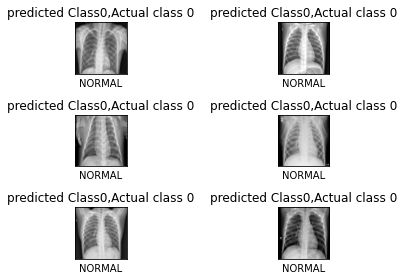

In [67]:
j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

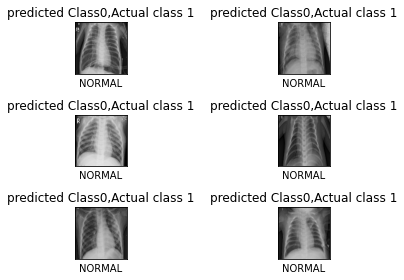

In [68]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

In [69]:
pred=vggmodel1.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

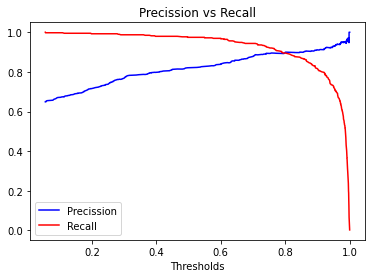

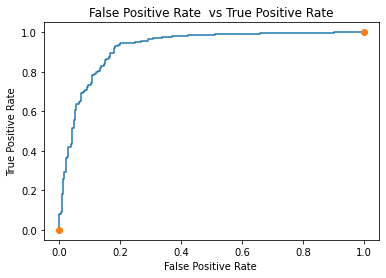

In [70]:
def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)

In [71]:
vggmodel = Sequential(vgg16_model.layers)
vggmodel.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(150,150,1)))
vggmodel.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))

vggmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
vggmodel.add(Dropout(0.25))

vggmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
vggmodel.add(Dropout(0.25))

vggmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
vggmodel.add(Dropout(0.25))


vggmodel.add(Flatten())
vggmodel.add(Dense(units = 512,activation = 'relu'))
vggmodel.add(Dropout(0.25))
vggmodel.add(Dense(1,activation = 'sigmoid'))
vggmodel.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [72]:
vgghist=vggmodel.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 35s 206ms/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 1.3297 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 33s 203ms/step - loss: 0.2459 - accuracy: 0.9013 - val_loss: 2.0562 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 33s 203ms/step - loss: 0.2250 - accuracy: 0.9138 - val_loss: 2.7771 - val_accuracy: 0.5625
Epoch 4/20
163/163 [==============================] - 33s 203ms/step - loss: 0.2213 - accuracy: 0.9134 - val_loss: 1.6789 - val_accuracy: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/20
163/163 [==============================] - 33s 204ms/step - loss: 0.2082 - accuracy: 0.9211 - val_loss: 2.1815 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 33s 203ms/step - loss: 0.2086 - accuracy: 0.9183 - val_loss: 2.2246 - val_accuracy: 0.5625
Epoch 7/20
163/163 [============================

In [73]:
vggmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)      

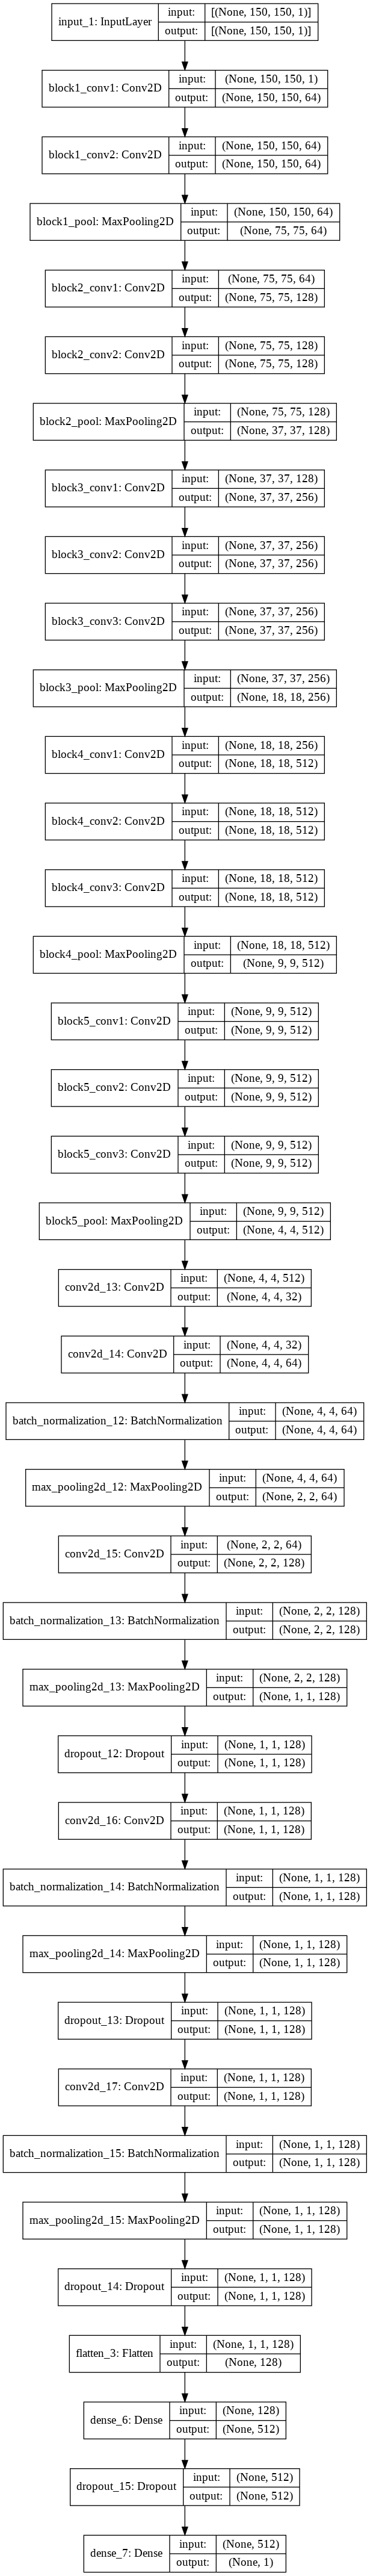

In [74]:
plot_model(vggmodel, to_file='vggmodel_plot.png', show_shapes=True, show_layer_names=True)

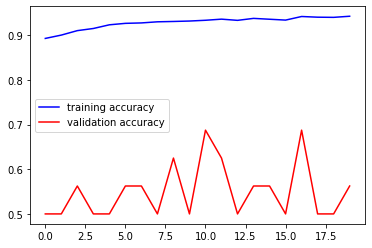

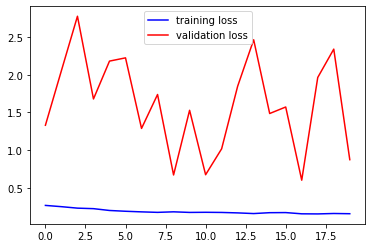

In [75]:
accuracy = vgghist.history['accuracy']
val_accuracy=vgghist.history['val_accuracy']
loss=vgghist.history['loss']
val_loss=vgghist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [76]:
scor = vggmodel.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 2s - loss: 0.2823 - accuracy: 0.8990
test los 0.2823
test acc 0.8990


In [77]:
scor = vggmodel.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 11s - loss: 0.2005 - accuracy: 0.9156
train los 0.2005
train acc 0.9156


In [78]:
prediction =np.argmax(vggmodel.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]

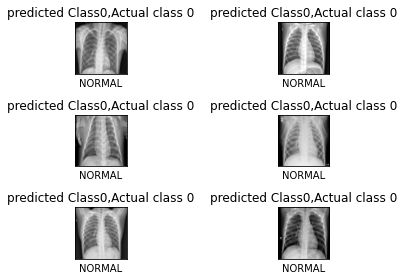

In [80]:
j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

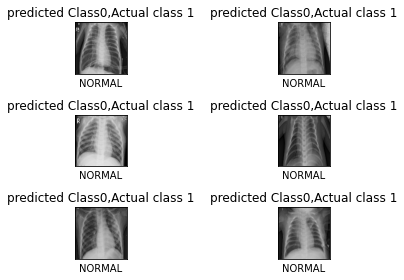

In [81]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

In [82]:
pred=vggmodel.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

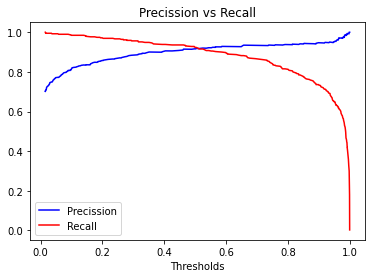

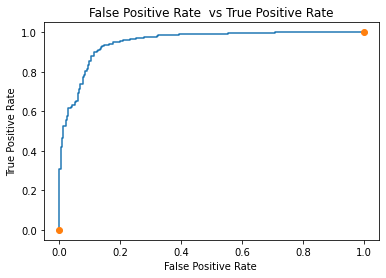

In [83]:
def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)

In [84]:
#### VGG19 model

In [85]:
vgg19_model= VGG19(input_shape=(150,150,1),include_top=False,weights=None)

In [86]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

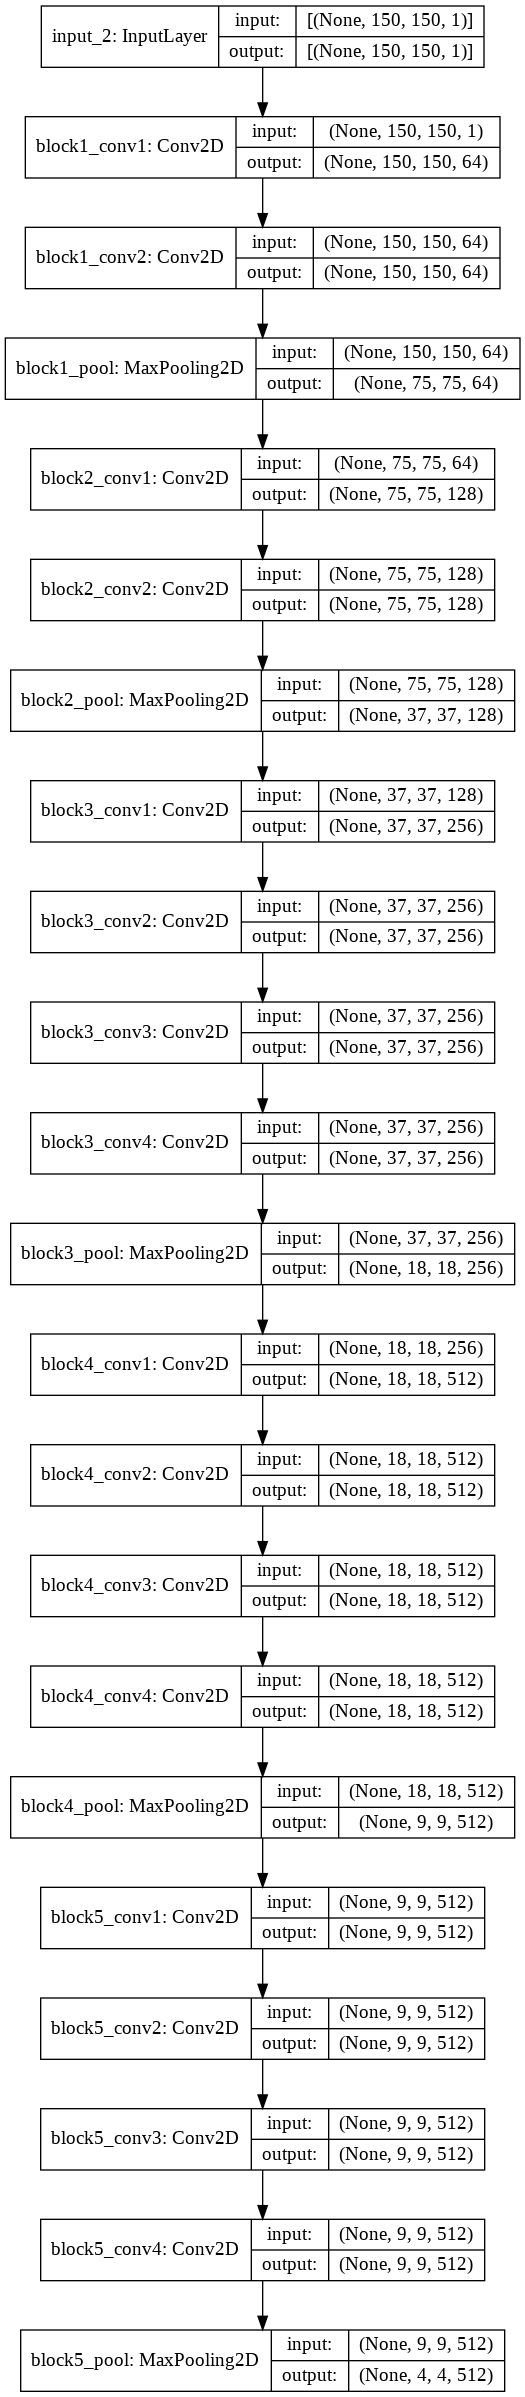

In [87]:
plot_model(vgg19_model, to_file='vggmodel_plot.png', show_shapes=True, show_layer_names=True)

In [88]:
vgg19model = Sequential(vgg19_model.layers)
vgg19model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(150,150,1)))
vgg19model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vgg19model.add(BatchNormalization())
vgg19model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))

vgg19model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vgg19model.add(BatchNormalization())
vgg19model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
vgg19model.add(Dropout(0.25))

vgg19model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vgg19model.add(BatchNormalization())
vgg19model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
vgg19model.add(Dropout(0.25))

vgg19model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
vgg19model.add(BatchNormalization())
vgg19model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
vgg19model.add(Dropout(0.25))


vgg19model.add(Flatten())
vgg19model.add(Dense(units = 512,activation = 'relu'))
vgg19model.add(Dropout(0.25))
vgg19model.add(Dense(1,activation = 'sigmoid'))
vgg19model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [89]:
vgg19hist=vgg19model.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 42s 248ms/step - loss: 0.6415 - accuracy: 0.6764 - val_loss: 0.8061 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 40s 245ms/step - loss: 0.5739 - accuracy: 0.7222 - val_loss: 5.1112 - val_accuracy: 0.4375
Epoch 3/20
163/163 [==============================] - 40s 245ms/step - loss: 0.4441 - accuracy: 0.7894 - val_loss: 1.5362 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 40s 245ms/step - loss: 0.4045 - accuracy: 0.8178 - val_loss: 1.3700 - val_accuracy: 0.4375

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/20
163/163 [==============================] - 40s 245ms/step - loss: 0.3622 - accuracy: 0.8433 - val_loss: 1.6505 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 40s 245ms/step - loss: 0.3332 - accuracy: 0.8502 - val_loss: 1.9778 - val_accuracy: 0.5000
Epoch 7/20
163/163 [============================

In [90]:
vgg19model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)      

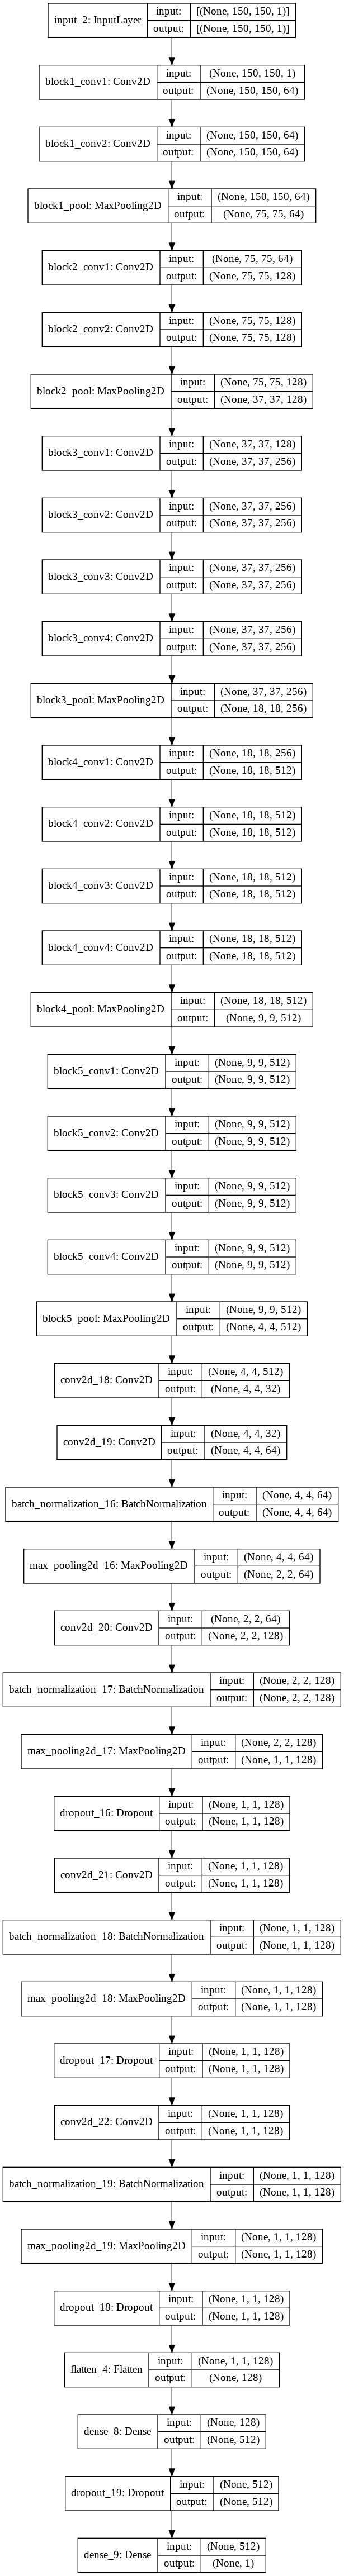

In [91]:
plot_model(vgg19model, to_file='vgg19model_plot.png', show_shapes=True, show_layer_names=True)

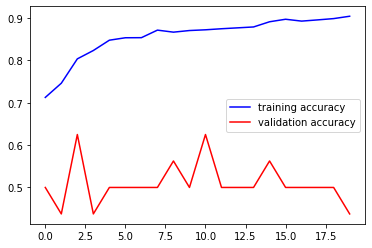

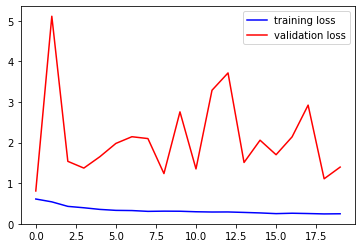

In [92]:
accuracy = vgg19hist.history['accuracy']
val_accuracy=vgg19hist.history['val_accuracy']
loss=vgg19hist.history['loss']
val_loss=vgg19hist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [93]:
scor = vgg19model.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 2s - loss: 0.8350 - accuracy: 0.6635
test los 0.8350
test acc 0.6635


In [94]:
scor = vgg19model.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 13s - loss: 0.9546 - accuracy: 0.6204
train los 0.9546
train acc 0.6204


In [95]:
prediction =np.argmax(vgg19model.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [96]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]

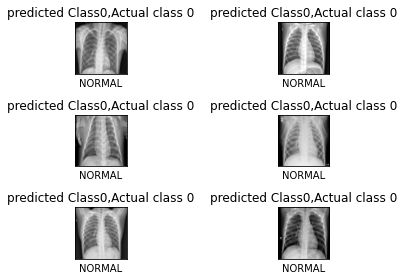

In [97]:
j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

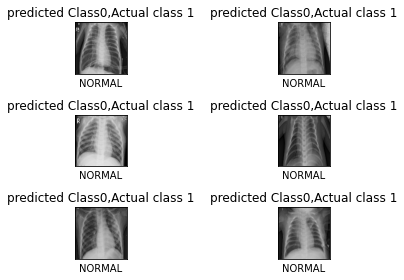

In [98]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

In [99]:
pred=vgg19model.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

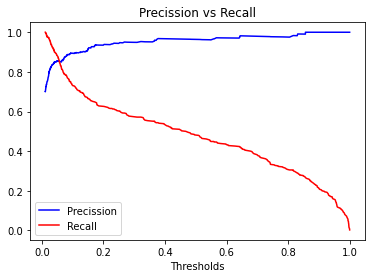

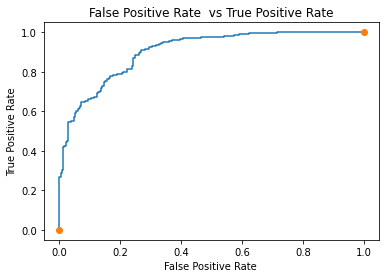

In [100]:
def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)

In [101]:
### Resnet50

In [102]:
res50_model= ResNet50(input_shape=(150,150,1),include_top=False,weights=None)

In [103]:
res50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

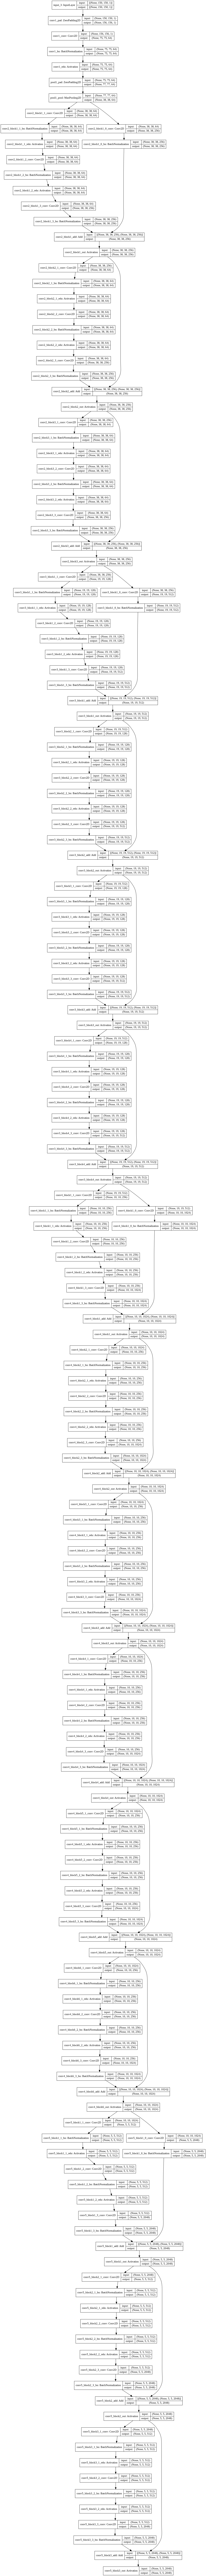

In [104]:
plot_model(res50_model, to_file='res50_plot.png', show_shapes=True, show_layer_names=True)

In [105]:
res50model = Sequential()
res50model.add(res50_model)
res50model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(150,150,1)))
res50model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
res50model.add(BatchNormalization())
res50model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))

res50model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
res50model.add(BatchNormalization())
res50model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
res50model.add(Dropout(0.25))

res50model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
res50model.add(BatchNormalization())
res50model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
res50model.add(Dropout(0.25))

res50model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
res50model.add(BatchNormalization())
res50model.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
res50model.add(Dropout(0.25))


res50model.add(Flatten())
res50model.add(Dense(units = 512,activation = 'relu'))
res50model.add(Dropout(0.25))
res50model.add(Dense(1,activation = 'sigmoid'))
res50model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [106]:
res50hist=res50model.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 40s 201ms/step - loss: 0.4764 - accuracy: 0.7794 - val_loss: 2.2778 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 31s 191ms/step - loss: 0.2783 - accuracy: 0.8795 - val_loss: 3.1931 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 31s 190ms/step - loss: 0.2275 - accuracy: 0.9100 - val_loss: 4.3449 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 31s 191ms/step - loss: 0.1965 - accuracy: 0.9230 - val_loss: 4.2976 - val_accuracy: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/20
163/163 [==============================] - 31s 191ms/step - loss: 0.1823 - accuracy: 0.9297 - val_loss: 4.1308 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 31s 191ms/step - loss: 0.1593 - accuracy: 0.9399 - val_loss: 2.5442 - val_accuracy: 0.5000
Epoch 7/20
163/163 [============================

In [107]:
res50model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23581440  
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 32)          589856    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 5, 5, 64)          256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
batch_normalization_21 (Batc (None, 3, 3, 128)        

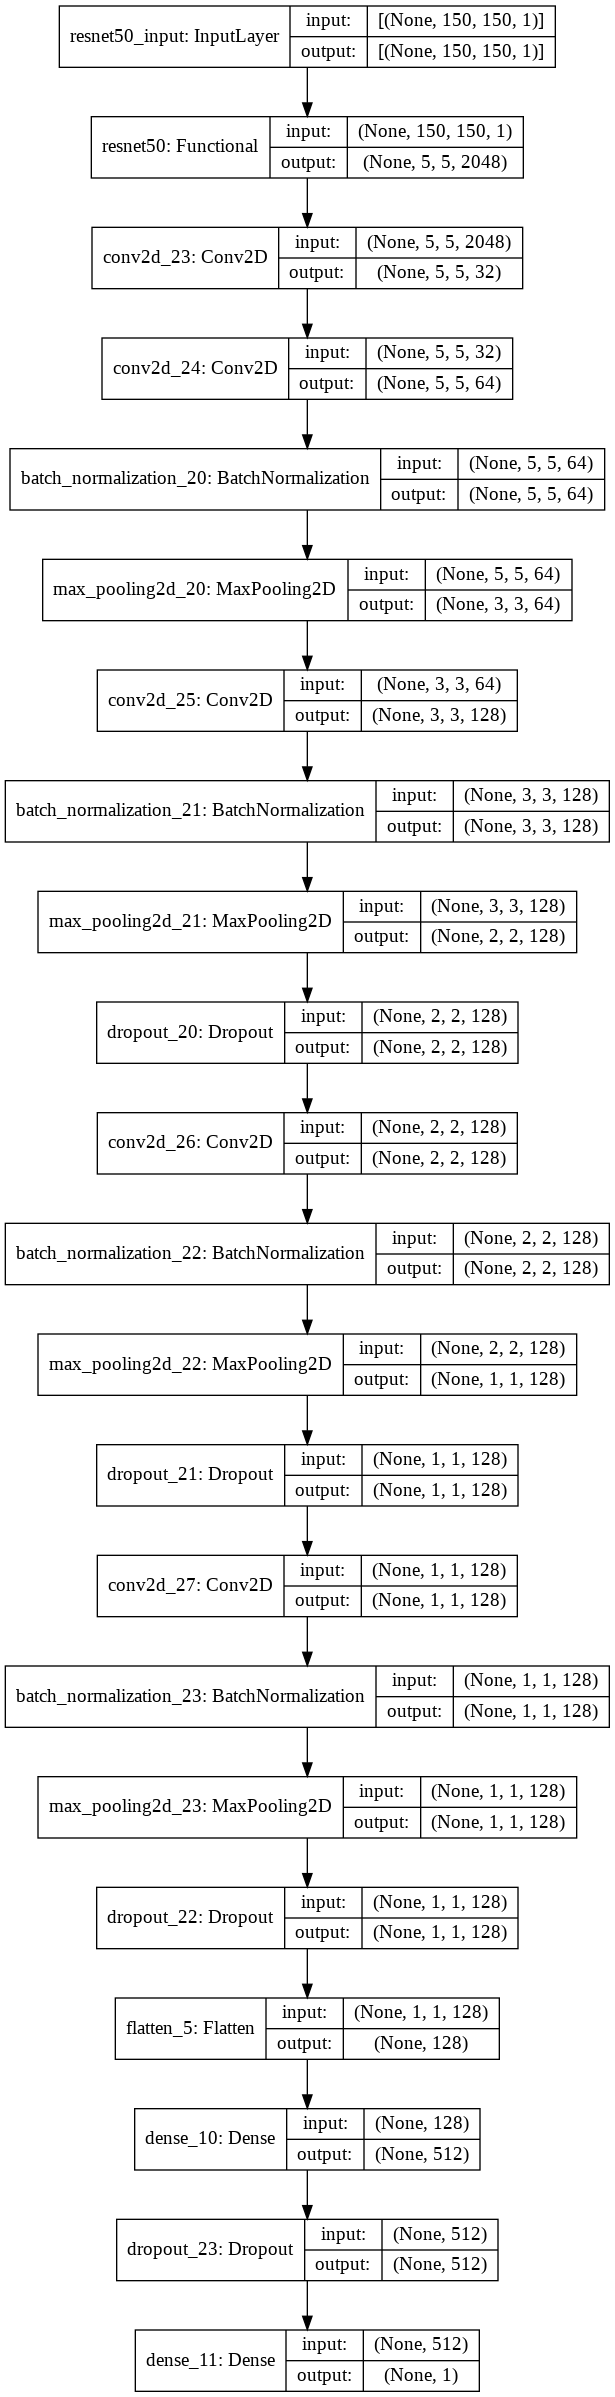

In [108]:
plot_model(res50model, to_file='res50model_plot.png', show_shapes=True, show_layer_names=True)

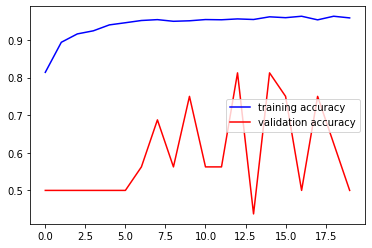

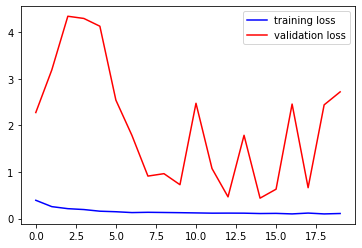

In [109]:
accuracy = res50hist.history['accuracy']
val_accuracy=res50hist.history['val_accuracy']
loss=res50hist.history['loss']
val_loss=res50hist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [110]:

scor = res50model.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))



scor = res50model.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

20/20 - 2s - loss: 3.1474 - accuracy: 0.4167
test los 3.1474
test acc 0.4167
163/163 - 9s - loss: 4.2265 - accuracy: 0.3066
train los 4.2265
train acc 0.3066


In [111]:
prediction =np.argmax(res50model.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

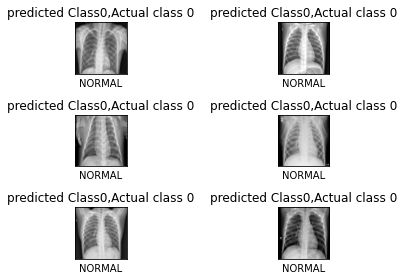

In [112]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]




j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1





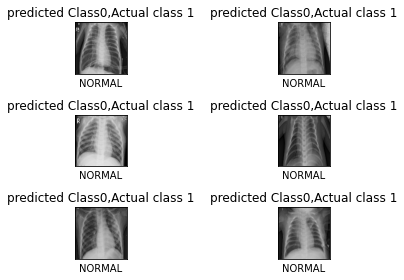

In [113]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

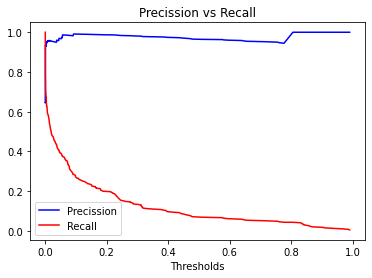

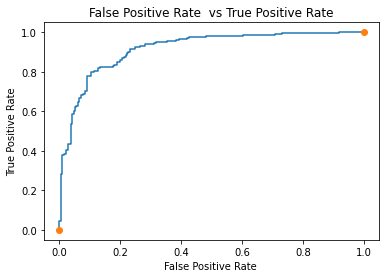

In [114]:
pred=res50model.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)



In [115]:
model2 = Sequential()
model2.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(150,150,1)))
model2.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))

model2.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(units = 512,activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1,activation = 'sigmoid'))
model2.compile(optimizer = "RmsProp" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [116]:

hist2=model2.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 16s 87ms/step - loss: 2.0281 - accuracy: 0.7675 - val_loss: 40.6947 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 14s 85ms/step - loss: 0.3654 - accuracy: 0.8659 - val_loss: 59.1826 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2971 - accuracy: 0.8969 - val_loss: 37.4113 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 14s 84ms/step - loss: 0.2743 - accuracy: 0.9090 - val_loss: 2.1924 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2250 - accuracy: 0.9178 - val_loss: 0.9172 - val_accuracy: 0.7500
Epoch 6/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2427 - accuracy: 0.9134 - val_loss: 1.3215 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2399 - accuracy: 0.9182 - val_loss: 18.6697 - val_accur

In [117]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
batch_normalization_24 (Batc (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization_25 (Batc (None, 75, 75, 128)       512       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 38, 38, 128)      

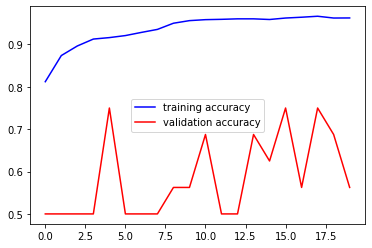

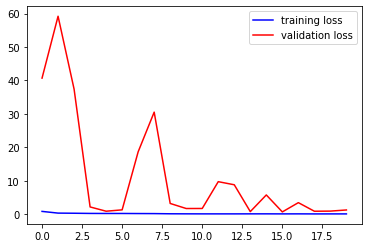

In [118]:
accuracy = hist2.history['accuracy']
val_accuracy=hist2.history['val_accuracy']
loss=hist2.history['loss']
val_loss=hist2.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [119]:
scor = model2.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 1s - loss: 0.3362 - accuracy: 0.8830
test los 0.3362
test acc 0.8830


In [125]:
scor = model2.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 4s - loss: 0.4088 - accuracy: 0.8493
train los 0.4088
train acc 0.8493


In [126]:
prediction =np.argmax(model2.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

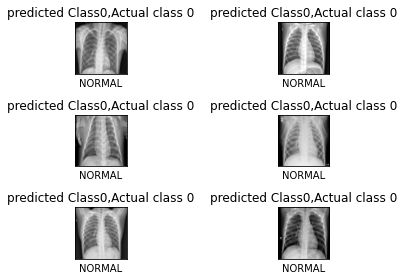

In [127]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]




j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1



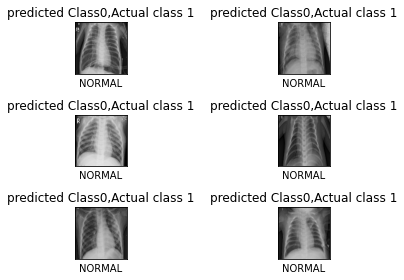

In [128]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

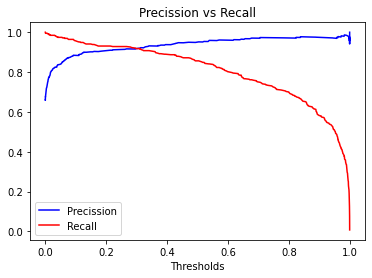

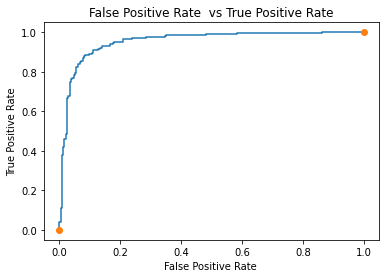

In [129]:
pred=model2.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)


In [132]:
model3 = Sequential()
model3.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(150,150,1)))
model3.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))

model3.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2,strides = 2,padding = 'same'))
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(units = 512,activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1,activation = 'sigmoid'))
model3.compile(optimizer = "Adagrad" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [133]:
hist3=model3.fit(datageneration.flow(X_train,Y_train,batch_size=32),epochs = 20, validation_data = datageneration.flow(X_val,Y_val),callbacks = callbacks)

Epoch 1/20
163/163 [==============================] - 15s 85ms/step - loss: 0.6551 - accuracy: 0.7715 - val_loss: 1.9910 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2740 - accuracy: 0.8907 - val_loss: 3.7374 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2308 - accuracy: 0.8993 - val_loss: 4.7966 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 14s 85ms/step - loss: 0.2147 - accuracy: 0.9065 - val_loss: 3.5298 - val_accuracy: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/20
163/163 [==============================] - 14s 84ms/step - loss: 0.2105 - accuracy: 0.9160 - val_loss: 2.0051 - val_accuracy: 0.5625
Epoch 6/20
163/163 [==============================] - 14s 84ms/step - loss: 0.2127 - accuracy: 0.9103 - val_loss: 1.8861 - val_accuracy: 0.5625
Epoch 7/20
163/163 [==============================] - 

In [134]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
batch_normalization_32 (Batc (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization_33 (Batc (None, 75, 75, 128)       512       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 38, 38, 128)      

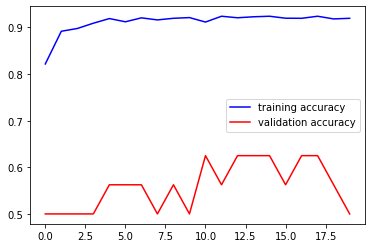

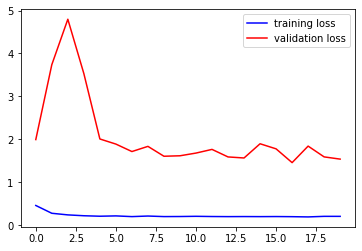

In [135]:
accuracy = hist3.history['accuracy']
val_accuracy=hist3.history['val_accuracy']
loss=hist3.history['loss']
val_loss=hist3.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"b",label="training accuracy")
plt.plot(epochs, val_accuracy, "r",label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.legend()
plt.show()

In [136]:
scor = model3.evaluate((X_test),(Y_test),verbose=2)

print("test los {:.4f}".format(scor[0]))
print("test acc {:.4f}".format(scor[1]))

20/20 - 1s - loss: 0.3326 - accuracy: 0.8814
test los 0.3326
test acc 0.8814


In [137]:
scor = model3.evaluate((X_train),(Y_train),verbose=2)

print("train los {:.4f}".format(scor[0]))
print("train acc {:.4f}".format(scor[1]))

163/163 - 4s - loss: 0.1833 - accuracy: 0.9214
train los 0.1833
train acc 0.9214


In [139]:
prediction =np.argmax(model3.predict(X_test), axis=-1)
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

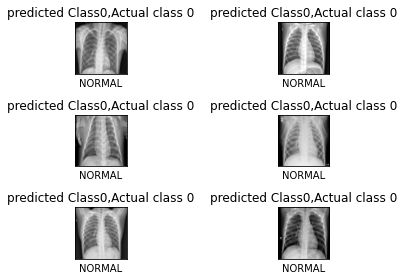

In [140]:
correct= np.nonzero(prediction==Y_test)[0]
incorrect= np.nonzero(prediction!=Y_test)[0]




j=0
for i in correct[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1


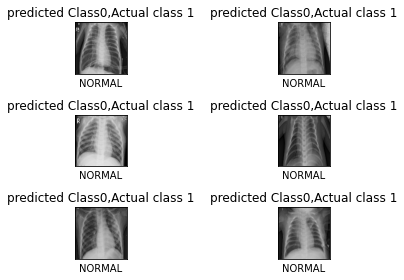

In [141]:
j=0
for i in incorrect[:6]:
  plt.subplot(3,2,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i].reshape(150,150),cmap="gray")
  plt.xlabel(labels[prediction[i]])
  plt.title('predicted Class{},Actual class {}'.format(prediction[i],Y_test[i]))
  plt.tight_layout()
  j+=1

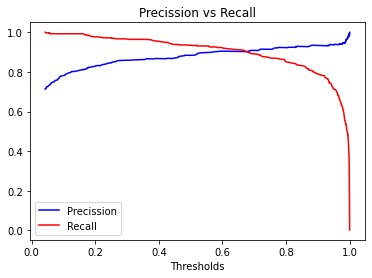

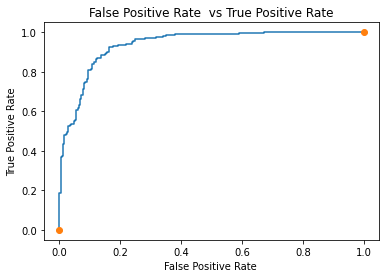

In [143]:
pred=model3.predict(X_test)
precission,recall,thresholds = precision_recall_curve(Y_test,pred)
fpr,tpr, threshold2= roc_curve(Y_test,pred)

def  precision_recall_plot(precission,recall,thresholds):
  plt.plot(thresholds,precission[:-1],'b')
  plt.plot(thresholds,recall[:-1],'r')
  plt.title('Precission vs Recall')
  plt.xlabel('Thresholds')
  plt.legend(['Precission','Recall'],loc='best')
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'o')
  plt.title('False Positive Rate  vs True Positive Rate')
  plt.xlabel('False Positive Rate ') 
  plt.ylabel('True Positive Rate')
  plt.show()
precision_recall_plot(precission,recall,thresholds)
plot_roc(fpr,tpr)